# **TAREA 1 OPTMIZACIÓN**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import math

In [7]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# **Funciones Auxiliares**




In [7]:
def plot_error_convergence(df):
    error_data = df[df["Error"].notna() & (df["Error"] != 0)].copy()

    if len(error_data) == 0:
        print("No hay datos de error suficientes para graficar")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Error vs Iteración (escala lineal)
    ax1.plot(error_data.index, error_data["Error"], 'o-', linewidth=2, markersize=8)
    ax1.set_xlabel('Iteración', fontsize=12)
    ax1.set_ylabel('Error Relativo', fontsize=12)
    ax1.set_title('Convergencia del Error - Escala Lineal', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('linear')

    # Gráfico 2: Error vs Iteración (escala logarítmica)
    ax2.semilogy(error_data.index, error_data["Error"], 's-', linewidth=2, markersize=8, color='red')
    ax2.set_xlabel('Iteración', fontsize=12)
    ax2.set_ylabel('Error Relativo (log)', fontsize=12)
    ax2.set_title('Convergencia del Error - Escala Logarítmica', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_function_and_roots(f, xmin, xmax, root, df, name):
    x = np.linspace(xmin, xmax, 1000)
    try:
        y = [f(xi) for xi in x]
    except:
        print("Error al evaluar la función para el gráfico")
        return

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Graficar la función
    ax.plot(x, y, 'b-', linewidth=2, label='f(x)')
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Marcar la raíz encontrada
    ax.plot(root, f(root), 'ro', markersize=10, label=f'Raíz ≈ {root:.6f}')

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title(f'Método de {name} - Convergencia', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def show_dataframe(df, name):

    df_styled = df.style.format({
        'Xl': '{:.6f}',
        'Xu': '{:.6f}',
        'Xr': '{:.6f}',
        'f(Xl)': '{:.6f}',
        'f(Xr)': '{:.6f}',
        'f(Xl) * f(Xr)': '{:.6f}',
        'Error': lambda x: f'{x:.2e}' if x is not None and x != 0 else 'N/A'
    }).background_gradient(subset=['Xr'], cmap='Blues')\
      .background_gradient(subset=['Error'], cmap='Reds')\
      .set_caption(f"Iteraciones del Método de {name}")\
      .set_table_styles([
          {'selector': 'caption',
           'props': [('font-size', '16px'), ('font-weight', 'bold')]},
          {'selector': 'th',
           'props': [('background-color', '#4CAF50'), ('color', 'white')]},
      ])

    display(df_styled)

In [20]:
def getInterval(f, xmin, xmax, pasos=100):
    h = (xmax - xmin) / pasos
    x, fa = xmin, f(xmin)
    a = b = None

    # Buscar intervalo con cambio de signo
    for _ in range(pasos):
        x2 = x + h
        fb = f(x2)
        if fa * fb <= 0:
            a, b = x, x2
            break
        x, fa = x2, fb

    if a is None:
        raise ValueError("No se encontró cambio de signo en el rango dado.")

    return a, b

# **Método de Bisección**

#### Este algoritmo busca las raices de una función dividiendo los intervalos a la mitad y seleccionando los subintervalos que tienen la raiz.


## Fórmulas usadas:

$$
\begin{aligned}
xr &= \frac{xl + xu}{2} \quad & error =\frac{xr_{new} - xr_{old}}{xr_{new}}
\end{aligned}
$$



In [21]:
def biseccion_auto(f, xmin, xmax, pasos=100, tol=1e-6):
    function_name = "Bisección"
    h = (xmax - xmin) / pasos

    a, b = getInterval(f, xmin, xmax)

    iteraciones = []
    n = 0
    error = float("inf")
    xr_old = None

    # Algoritmo Bisección
    while error is None or error > tol:
        n += 1
        xr = (a + b) / 2
        fa_val = f(a)
        fc = f(xr)
        producto = fa_val * fc

        if xr_old is not None:
            error = abs((xr - xr_old)/xr)
        else:
            error = None

        # Guardar datos
        iteraciones.append({
            "Iteración": n,
            "Xl": a,
            "Xu": b,
            "Xr": xr,
            "f(Xl) * f(Xr)": producto,
            "Error": error
        })

        #Reglas
        if fc == 0:
            break
        if producto < 0:
            b = xr
        else:
            a = xr
        xr_old = xr

    df = pd.DataFrame(iteraciones)
    df.set_index("Iteración", inplace=True)
    return xr, df, function_name

# Algoritmos para la visualización de los gráficos y dataframe

## **NOTA:** El input recibe las funciones en lenguaje de python y se calcula automaticamente el cambio de signo de las funciones, ej:  x ** 3 + 4 * x ** 2 - 10

In [22]:
expr = input("Ingresa la función f(x): ")
bisection_function = lambda x: eval(expr, {"x": x, "math": math, "np": np, "__builtins__": {}})
xr, df, name = biseccion_auto(bisection_function, 0, 5)

Ingresa la función f(x): x**10 - 1


# Mostrar Dataframe

In [23]:
show_dataframe(df, name)

,Xl,Xu,Xr,f(Xl) * f(Xr),Error
Iteración,,,,,
1,0.950000,1.000000,0.975000,0.089751,nan
2,0.975000,1.000000,0.987500,0.026437,1.27e-02
3,0.987500,1.000000,0.993750,0.007183,6.29e-03
4,0.993750,1.000000,0.996875,0.001873,3.13e-03
5,0.996875,1.000000,0.998438,0.000478,1.56e-03
6,0.998438,1.000000,0.999219,0.000121,7.82e-04
7,0.999219,1.000000,0.999609,0.000030,3.91e-04
8,0.999609,1.000000,0.999805,0.000008,1.95e-04
9,0.999805,1.000000,0.999902,0.000002,9.77e-05


# Mostrar Gráficas

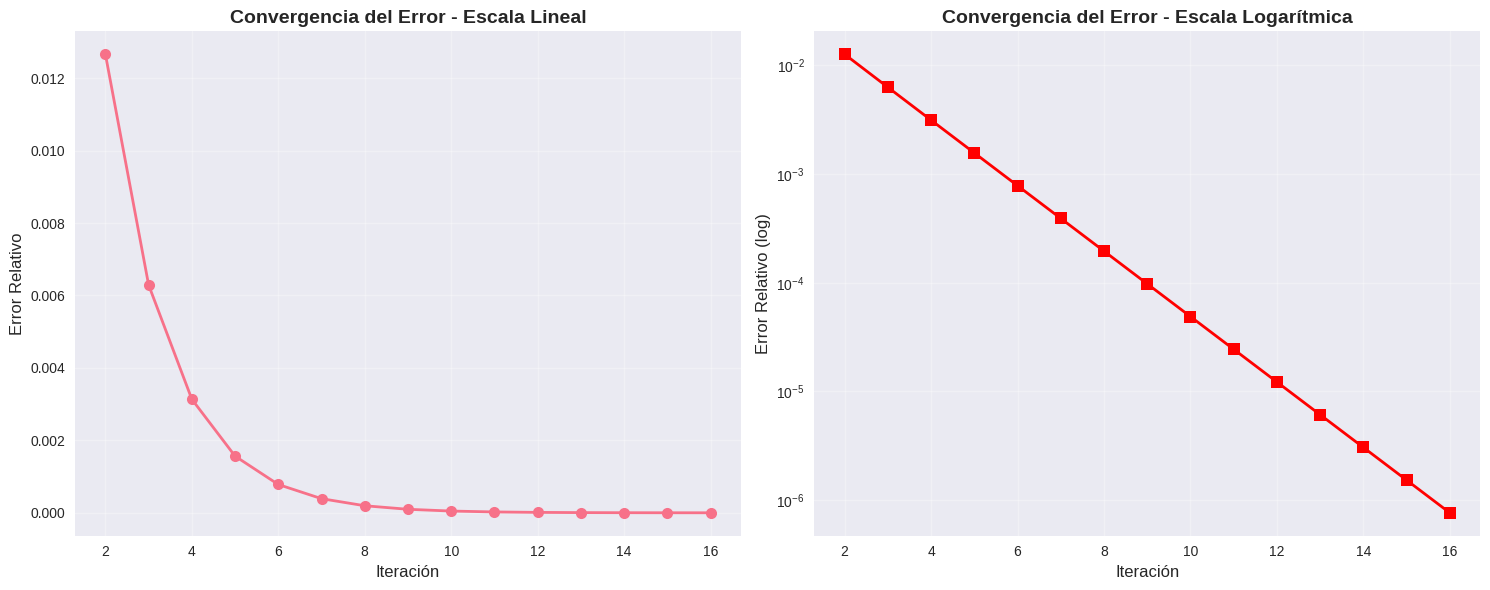

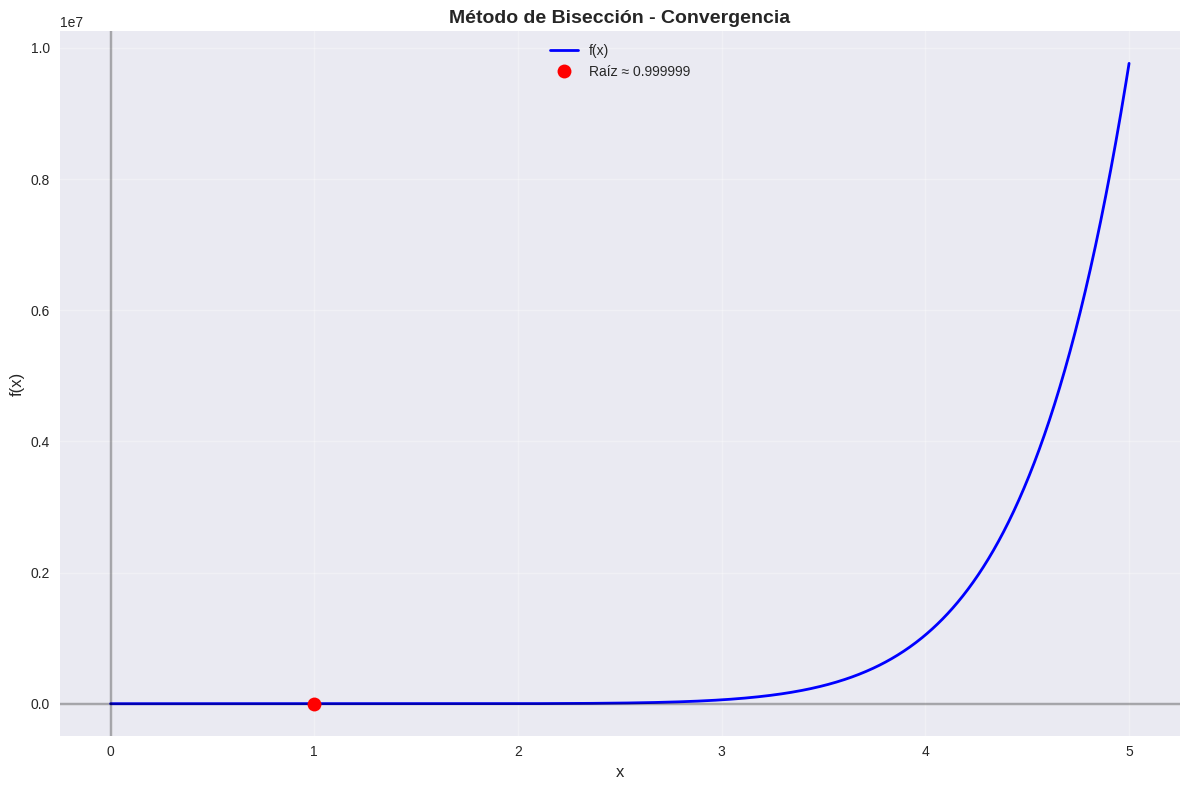

In [24]:
plot_error_convergence(df)
plot_function_and_roots(bisection_function, 0, 5, xr, df, name)

## *El gráfico de convergencia nos ofrece una vista de como evoluciona una estimación de error*

# **Método de Falsa Posición**

## Este método es un algoritmo de busqueda de raíces que utiliza una sucesión de líneas secantes combinadas con el método de bisección para lograr una aproximación a una raíz de una función f.

## Fórmulas usadas:

$$
\begin{aligned}
xr &= {xu} - \frac{f(xu)(xl - xu)}{f(xl) - f(xu)} \quad & error =\frac{xr_{new} - xr_{old}}{xr_{new}}
\end{aligned}
$$



In [26]:
#The method is good, review when the user wants to input a and b

def false_position_auto(f, xmin, xmax, pasos=100, tol=1e-6):
    function_name = "Falsa Posición"
    if f == None:
      raise ValueError("Debes ingresar una función")

    a, b = getInterval(f, xmin, xmax)

    iteraciones = []
    n = 0
    error = float("inf")
    xr_old = None

    # Algoritmo Bisección
    while error is None or error > tol:
        n += 1
        xr = b - ((f(b) * (a - b)) / (f(a) - f(b)))
        fa_val = f(a)
        fc = f(xr)
        producto = fa_val * fc

        if xr_old is not None:
            error = abs((xr - xr_old)/xr)
        else:
            error = None

        # Guardar datos
        iteraciones.append({
            "Iteración": n,
            "Xl": a,
            "Xu": b,
            "Xr": xr,
            "f(Xl) * f(Xr)": producto,
            "Error": error
        })

        if fc == 0:
            break
        if producto < 0:
            b = xr
        else:
            a = xr
        xr_old = xr

    df = pd.DataFrame(iteraciones)
    df.set_index("Iteración", inplace=True)
    return xr, df, function_name

In [27]:
expr2 = input("Ingresa la función f(x): ")
false_function = lambda x: eval(expr2, {"x": x, "np": np, "math": math, "__builtins__": {}})
xr2, df2, name2 = false_position_auto(false_function, 0, 5)

Ingresa la función f(x): 2 * np.sin(x) - (x**2) / 10


In [ ]:
"2 * np.sin(x) - (x**2) / 10"

'2 * np.sin(x) - (x**2) / 10'

No hay datos de error suficientes para graficar


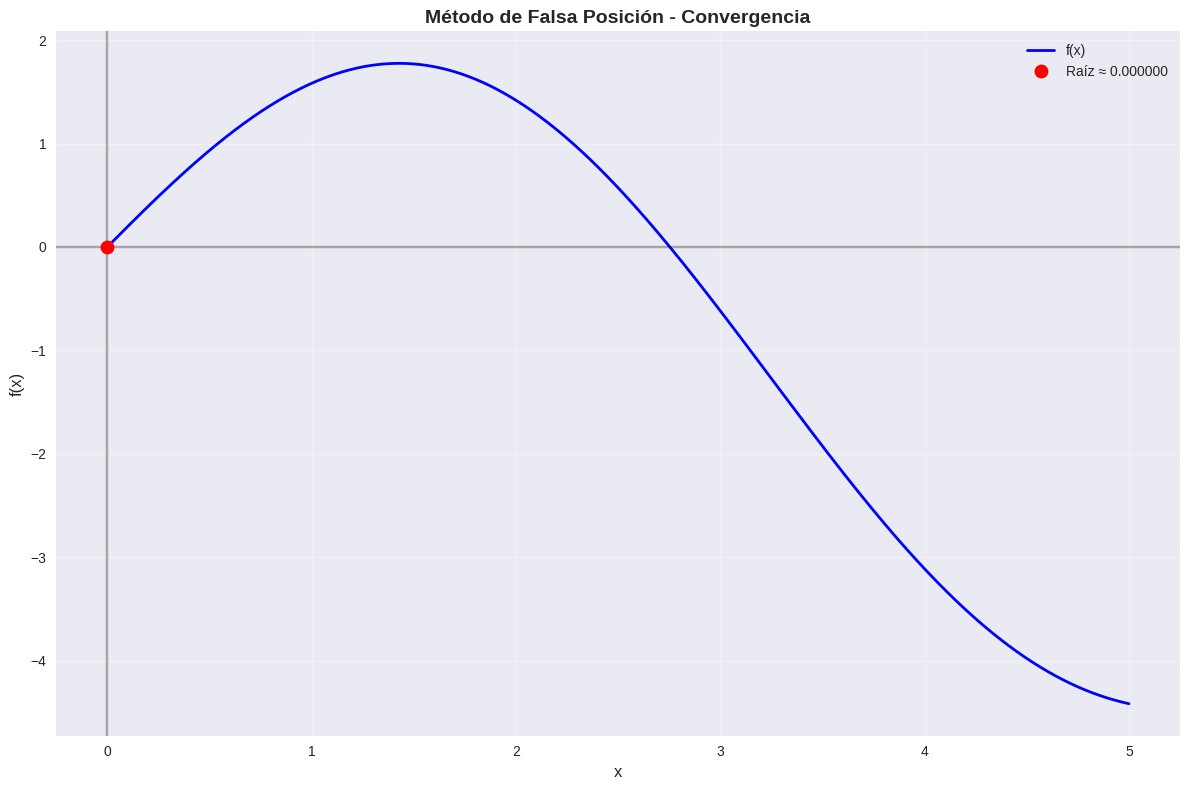

In [28]:
plot_error_convergence(df2)
plot_function_and_roots(false_function, 0, 5, xr2, df2, name2)

In [ ]:
"x**3 + 4*x**2 - 10"

'x**3 + 4*x**2 - 10'

# **Método de Razón Dorada**

## Fórmulas usadas:

$$
d = \frac{\sqrt{5} - 1}{2}(x_u - x_l), \quad
x_1 = x_l + d, \quad
x_2 = x_u - d
$$

In [14]:
def golden_section_auto(f, a_insert, b_insert, pasos=100, tol=0.001, is_min=False):
    function_name = "Razón Dorada"
    aureo = (math.sqrt(5) - 1) / 2

    a, b = a_insert, b_insert
    iteraciones = []
    n = 0
    d = aureo * (b - a)
    x1, x2 = a + d, b - d
    fxu, fxl = f(b), f(a)
    f1, f2 = f(x1), f(x2)

    # Algoritmo Bisección
    while d > tol:

        # Guardar datos
        iteraciones.append({
            "Iteración": n,
            "Xl": a,
            "f(xl)": fxl,
            "Xu": b,
            "f(xu)": fxu,
            "X1": x1,
            "X2": x2,
            "f(x1)": f1,
            "f(x2)": f2,
            "d": d
        })

        if is_min:
          condition = f1 < f2
        else:
          condition = f1 > f2

        n += 1
        if condition:
            a = x2
            d = aureo * (b - a)
            x1 = a + d
            x2 = b - d
            f1, f2 = f(x1), f(x2)
            fxu, fxl = f(b), f(a)
        else:
            b = x1
            d = aureo * (b - a)
            x1 = a + d
            x2 = b - d
            f1 = f(x1)
            f2 = f(x2)
            fxu, fxl = f(b), f(a)

    df = pd.DataFrame(iteraciones)
    df.set_index("Iteración", inplace=True)
    return d, df, function_name

In [ ]:
d,df3, name3 = golden_section_auto(false_function, 0, 4)

df3

In [16]:
expr3 = input("Ingresa la función f(x): ")
golden_section_function = lambda x: eval(expr3, {"x": x, "math": math, "np": np, "__builtins__": {}})

is_min_or_max = input("¿Es una función de minimización? (y/n): ").strip().lower() == "y"

print("¿Cómo quieres definir el intervalo [a, b]?")
print("  1) Ingresarlo manualmente")
print("  2) Calcularlo automáticamente a partir de [xmin, xmax]")

opcion = input("Elige 1 o 2 y presiona ⏎: ").strip()

if opcion == "1":
    a = float(input("Ingresa a: "))
    b = float(input("Ingresa b: "))
    d, df3, function_name3 = golden_section_auto(golden_section_function, a, b, pasos=100, is_min=is_min_or_max)
elif opcion == "2":
    xmin = float(input("Ingresa xmin: "))
    xmax = float(input("Ingresa xmax: "))
    pasos = int(input("Número de pasos para barrer (p.ej. 100): "))
    a, b = getInterval(golden_section_function, xmin, xmax)
    d, df3, function_name3 = golden_section_auto(golden_section_function, a, b, pasos, is_min=is_min_or_max)
else:
    print("Opción no válida.")

# try:
#     x_opt, tabla = golden_section_auto(golden_section_function, a, b, tol)
#     print(f"\nMínimo aproximado en x ≈ {x_opt:.6f}, f(x) ≈ {f(x_opt):.6f}")
#     print("\nResumen de iteraciones:")
#     print(tabla.tail())            # muestra últimas iteraciones
# except Exception as e:
#     print(f"Error: {e}")

df3

Ingresa la función f(x): 2 * np.sin(x) - (x**2) / 10
¿Es una función de minimización? (y/n): y
¿Cómo quieres definir el intervalo [a, b]?
  1) Ingresarlo manualmente
  2) Calcularlo automáticamente a partir de [xmin, xmax]
Elige 1 o 2 y presiona ⏎: 1
Ingresa a: 0
Ingresa b: 4
→ Intervalo encontrado: a = 0.0, b = 4.0


,Xl,f(xl),Xu,f(xu),X1,X2,f(x1),f(x2),d
Iteración,,,,,,,,,
0,0.000000,0.000000,4.0,-3.113605,2.472136,1.527864,0.629974,1.764720,2.472136
1,1.527864,1.764720,4.0,-3.113605,3.055728,2.472136,-0.762229,0.629974,1.527864
2,2.472136,0.629974,4.0,-3.113605,3.416408,3.055728,-1.709922,-0.762229,0.944272
3,3.055728,-0.762229,4.0,-3.113605,3.639320,3.416408,-2.279325,-1.709922,0.583592
4,3.416408,-1.709922,4.0,-3.113605,3.777088,3.639320,-2.613791,-2.279325,0.360680
5,3.639320,-2.279325,4.0,-3.113605,3.862233,3.777088,-2.811415,-2.613791,0.222912
6,3.777088,-2.613791,4.0,-3.113605,3.914855,3.862233,-2.929556,-2.811415,0.137767
7,3.862233,-2.811415,4.0,-3.113605,3.947378,3.914855,-3.000928,-2.929556,0.085145
8,3.914855,-2.929556,4.0,-3.113605,3.967478,3.947378,-3.044384,-3.000928,0.052622


# **Estudiante:** *Camilo Benavides Ramirez*